# **1. Perkenalan Dataset**


Sumber dataset (Kaggle): https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset

Dataset ini berisi informasi biaya asuransi medis untuk 1.338 individu. Di dalamnya terdapat variabel demografis dan terkait kesehatan seperti usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah tempat tinggal di AS.

Variabel target adalah charges, yaitu biaya asuransi medis yang ditagihkan kepada individu.

Penggunaan umum:
- Pemodelan regresi
- Riset ekonomi kesehatan
- Analisis penetapan harga asuransi
- Edukasi dan tutorial machine learning

Kolom:
- age: Usia penerima manfaat utama (int)
- sex: Jenis kelamin penerima manfaat (male, female)
- bmi: Body Mass Index, ukuran lemak tubuh berdasarkan tinggi dan berat (float)
- children: Jumlah anak yang ditanggung asuransi kesehatan (int)
- smoker: Status merokok penerima manfaat (yes, no)
- region: Wilayah tempat tinggal di AS (northeast, northwest, southeast, southwest)
- charges: Biaya asuransi medis yang ditagihkan (float)

Potensi penggunaan:
- Membangun model prediktif untuk biaya medis
- Mengeksplorasi pengaruh merokok dan BMI terhadap charges
- Mengajarkan regresi dan rekayasa fitur kepada siswa
- Menganalisis tren keterjangkauan layanan kesehatan

# **2. Import Library**

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# **3. Memuat Dataset**

In [10]:
# Load dataset
data = pd.read_csv("../insurance_raw.csv")

In [11]:
# Menampilkan 5 baris pertama dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Menampilkan 5 baris terakhir dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **4. Exploratory Data Analysis (EDA)**

In [25]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [24]:
print(data.duplicated().sum())

1


In [18]:
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts(), "\n")

sex
male      676
female    662
Name: count, dtype: int64 

smoker
no     1064
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



<Axes: >

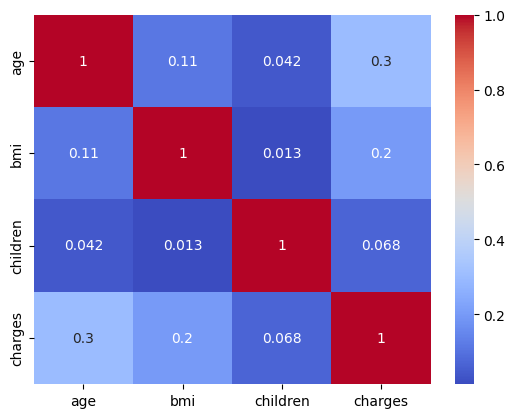

In [21]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [23]:
print("\n=== Rata-rata Charges berdasarkan Status Perokok ===")
print(data.groupby("smoker")["charges"].mean())

print("\n=== Rata-rata Charges berdasarkan Wilayah ===")
print(data.groupby("region")["charges"].mean())

print("\n=== Rata-rata Charges berdasarkan Jumlah Anak ===")
print(data.groupby("children")["charges"].mean())


=== Rata-rata Charges berdasarkan Status Perokok ===
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

=== Rata-rata Charges berdasarkan Wilayah ===
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

=== Rata-rata Charges berdasarkan Jumlah Anak ===
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


# **5. Data Preprocessing**

In [54]:
# Membuat salinan DataFrame
df = data.copy()

In [55]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
df = df.dropna()

In [56]:
# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

In [57]:
# 3. Normalisasi atau Standarisasi Fitur
categirical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
target_col = 'charges'

numerical_cols = numerical_cols.drop(target_col)

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [58]:
# 4. Deteksi dan Penanganan Outlier
for feature in numerical_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [59]:
# 5. Encoding Data Kategorikal
df = pd.get_dummies(df, columns=categirical_cols,dtype=int)